
# Project: Investigate a Dataset : TMDb Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
from pandas import read_csv
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

Let's start uploading tmb movies dataset 

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
data = read_csv('tmdb-movies.csv', encoding='ISO-8859-1')

In [3]:
print("For now there are: " + str(data.shape[0]) + " and " + str(data.shape[1]) + " columns")

For now there are: 10866 and 21 columns


Exploring the first 3 registers of the dataset so we can be familiarized

In [4]:
data.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


Type of every single variable

In [5]:
data.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

General information about the dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Calculation of unique values in each column

In [7]:
data.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

Description of dataset

In [8]:
data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Looking for duplicated data

In [9]:
sum(data.duplicated())

1

Looking for null values in the data

In [10]:
data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [11]:
print("Total number of null values", np.count_nonzero(data.isnull()))

Total number of null values 13434


This is an initial report of the dataset:

Rows: 10866
Columns: 21

With 13434 null values present in variables: 

<ul>imdb_id</ul>
<ul>cast</ul>
<ul>homepage</ul>
<ul>director</ul>
<ul>tagline</ul>
<ul>keywords</ul>
<ul>overview</ul>
<ul>genres</ul>
<ul>production_companies</ul>

For now I'm going to drop duplicate data and eliminate rows that contain null values.



### Data Cleaning (Replace this with more specific notes!)

I decided to not use the following variables in my report:

<ul>homepage</ul>
<ul>tagline</ul>
<ul>overview</ul>

They would not provide valuable information to make my analysis.

In [12]:
data.drop(['homepage', 'tagline','overview'], axis=1, inplace=True)

Besides I'm going to eliminate all the drop and N/a rows in the dataset

In [13]:
print("Eliminating duplicate data")
data.drop_duplicates(inplace=True)
print("Eliminating data with N/A values")
data.dropna(subset=['genres', 'original_title', 'production_companies','runtime'], inplace=True)

Eliminating duplicate data
Eliminating data with N/A values


Visualization of dataset information once again

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9826 entries, 0 to 10865
Data columns (total 18 columns):
id                      9826 non-null int64
imdb_id                 9822 non-null object
popularity              9826 non-null float64
budget                  9826 non-null int64
revenue                 9826 non-null int64
original_title          9826 non-null object
cast                    9791 non-null object
director                9806 non-null object
keywords                8701 non-null object
runtime                 9826 non-null int64
genres                  9826 non-null object
production_companies    9826 non-null object
release_date            9826 non-null object
vote_count              9826 non-null int64
vote_average            9826 non-null float64
release_year            9826 non-null int64
budget_adj              9826 non-null float64
revenue_adj             9826 non-null float64
dtypes: float64(4), int64(6), object(8)
memory usage: 1.4+ MB


Now I'm going to separating values in Genre column for a future analysis:


In [15]:
# this function eturns this value if it exists at index i and if it doesn't
#return a null value. Avoids IndexError and KeyError
def safe_access(container, i):
    result = container.split('|')
    try:
        return result[i]
    except IndexError or Ksafe_accesseyError:
        return pd.np.nan

In [16]:
new_data=data[data['genres'].str.contains('|')]
new_data.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [17]:
print("Since all the rows have multiple values = " + (str(new_data.shape==data.shape)) + " I decided to pick the first 5")

Since all the rows have multiple values = True I decided to pick the first 5


In [18]:
df1=new_data.copy() 
df2=new_data.copy()
df3=new_data.copy()
df4=new_data.copy()
df5=new_data.copy()


df1['genres']=df1['genres'].apply(lambda x: safe_access(x,0)) 
df2['genres']=df2['genres'].apply(lambda x: safe_access(x,1))
df3['genres']=df3['genres'].apply(lambda x: safe_access(x,2))
df4['genres']=df4['genres'].apply(lambda x: safe_access(x,3))
df5['genres']=df5['genres'].apply(lambda x: safe_access(x,4))

print("null values in df1\n", np.count_nonzero(df1['genres'].isnull())) 
print("null values in df2\n", np.count_nonzero(df2['genres'].isnull()))
print("null values in df3\n", np.count_nonzero(df3['genres'].isnull()))
print("null values in df4\n", np.count_nonzero(df4['genres'].isnull()))
print("null values in df5\n", np.count_nonzero(df5['genres'].isnull()))



null values in df1
 0
null values in df2
 1982
null values in df3
 5101
null values in df4
 7972
null values in df5
 9318


Drop all the rows that have null values

In [19]:
df1.dropna(subset=['genres'],inplace=True)
df2.dropna(subset=['genres'],inplace=True)
df3.dropna(subset=['genres'],inplace=True)
df4.dropna(subset=['genres'],inplace=True)
df5.dropna(subset=['genres'],inplace=True)

print("null values in df1\n", np.count_nonzero(df1['genres'].isnull())) 
print("null values in df2\n", np.count_nonzero(df2['genres'].isnull()))
print("null values in df3\n", np.count_nonzero(df3['genres'].isnull()))
print("null values in df4\n", np.count_nonzero(df4['genres'].isnull()))
print("null values in df5\n", np.count_nonzero(df5['genres'].isnull()))


null values in df1
 0
null values in df2
 0
null values in df3
 0
null values in df4
 0
null values in df5
 0


In [20]:
df1=df1.append(df2, ignore_index=True)
df3=df3.append(df4,ignore_index=True)
df3=df3.append(df5,ignore_index=True)
dataset=df1.append(df3,ignore_index=True)
dataset.shape

(24757, 18)

The following step is to change datatype of release_data to tiestam from string

In [22]:
dataset['release_date']=pd.to_datetime(dataset['release_date'])
type(dataset['release_date'][0]) 
dataset['release_month']=dataset['release_date'].apply(lambda x: x.to_datetime().month)
dataset['release_month'].head(3)

/home/polo/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:2355: FutureWarning: to_datetime is deprecated. Use self.to_pydatetime()
  mapped = lib.map_infer(values, f, convert=convert_dtype)


0    6
1    5
2    3
Name: release_month, dtype: int64

In [23]:
#changes month number to month name in release_month
dataset['release_month']= dataset['release_month'].map({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'})
dataset['release_month'].head(3)

0     June
1      May
2    March
Name: release_month, dtype: object

In [24]:
dataset['genres']=dataset['genres'].replace({'Science Fiction':"Sci Fiction", "Documentary":"Doc'tary", "Adventure":"Adv're"})
dataset['genres'].unique()

array(['Action', "Adv're", 'Western', 'Sci Fiction', 'Drama', 'Family',
       'Comedy', 'Crime', 'Romance', 'War', 'Mystery', 'Thriller',
       'Fantasy', 'History', 'Animation', 'Horror', 'Music', "Doc'tary",
       'TV Movie', 'Foreign'], dtype=object)

In [25]:
dataset.to_csv('new_data_imdb.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: in which month can we generate the highest reveneu?

You can measure the success of a film based on the amount of revenue it generates, we can use data analysis to determine which month is more likely to help us released a popular movie.

In [32]:
# create a dictionary with the months and corresponding number
months_dict = {"January":1, "February":2, "March":3, "April":4, "May":5, "June":6, "July":7, "August":8, "September":9, "October":10, "November":11, "December":12 }
# define a function to return date in the dictionary
def month_value(date):
    return months_dict[date]
# extract the mean of the revenue for every month
month_revenues=dataset.groupby('release_month')['revenue_adj'].mean()
# extract the keys of month_revenues
keys=month_revenues.keys()
# sort the months
sorted_month=sorted(keys, key=month_value)
# visualize
sorted_month

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

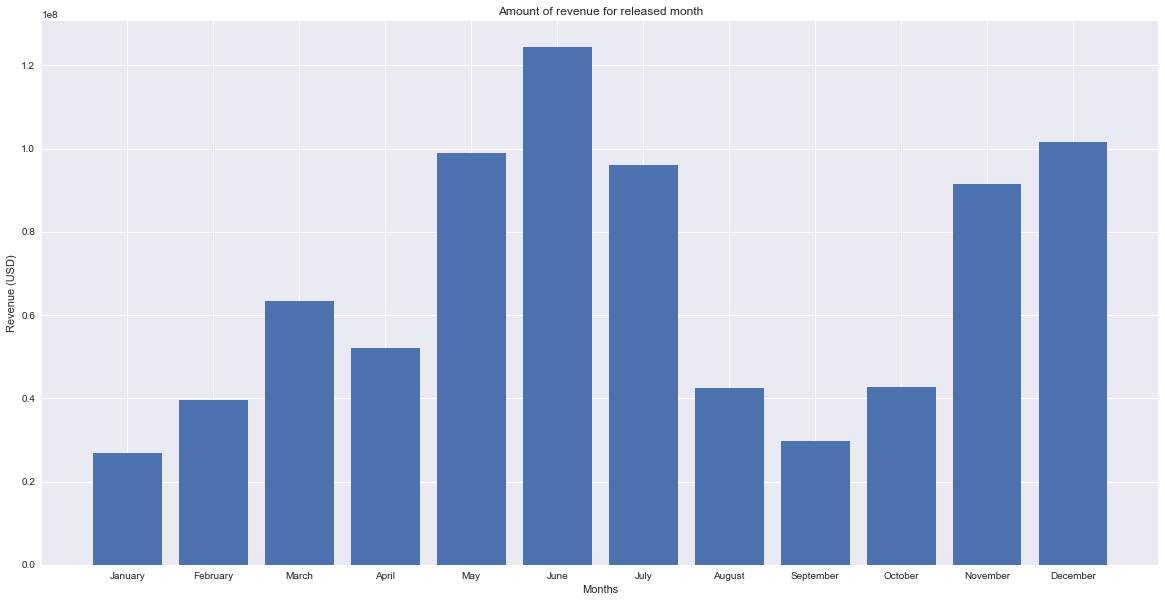

In [45]:
locations=[i for i in range(month_revenues.count())] 
height=[month_revenues[i] for i in sorted_month] #to have the values in order.
#Can't use the series keys directly because it sorts by first character
labels=sorted_month
plt.bar(locations, height, tick_label=labels) 
plt.rcParams['figure.figsize'] = [40,20]
plt.xlabel('Months')
plt.ylabel('Revenue (USD)')
plt.title('Amount of revenue for released month')
plt.rcParams.update({'font.size': 30})

With this histogram I want to show in a nice way the Revenue Variable in the months of the year, as you can see in above the May, June, July, November and December months generate more revenue. visualization tools are so helpful in order to understand information easier.

### Research Question 2  What genres generate the highest revenue?

Again I'm trying to measure how a film is usually more likely to succeed based on genre.

In [35]:
# group genres and revenue in a new variable
revenues_genres=dataset.groupby('genres')['revenue_adj'].mean()
revenues_genres

genres
Action         9.763580e+07
Adv're         1.498139e+08
Animation      9.287552e+07
Comedy         5.271744e+07
Crime          5.902647e+07
Doc'tary       3.292831e+06
Drama          4.394511e+07
Family         9.738196e+07
Fantasy        1.207935e+08
Foreign        1.918406e+06
History        5.198219e+07
Horror         2.579533e+07
Music          5.562651e+07
Mystery        5.322556e+07
Romance        5.243856e+07
Sci Fiction    9.363840e+07
TV Movie       4.325119e+05
Thriller       5.843933e+07
War            7.295850e+07
Western        4.754193e+07
Name: revenue_adj, dtype: float64

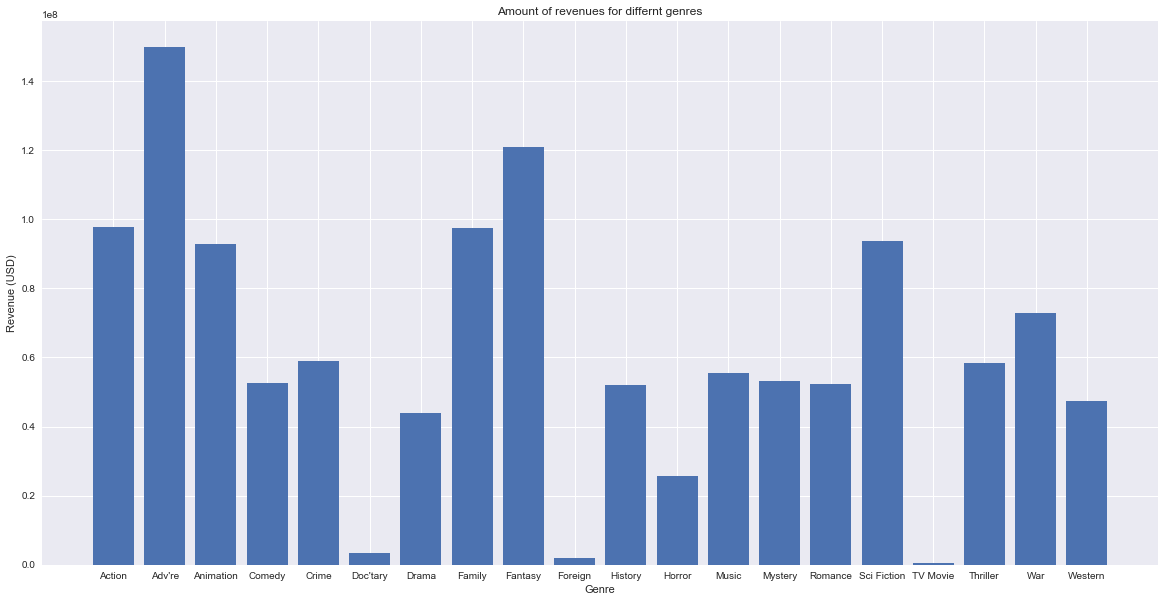

In [44]:
locations=[i for i in range(revenues_genres.count())]
labels= revenues_genres.keys()
height=revenues_genres.values
plt.bar(locations, height, tick_label=labels) 
# title
plt.title("Amount of revenues for differnt genres")
# x label
plt.xlabel("Genre") 
# y label
plt.ylabel("Revenue (USD)")
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=20
fig_size[1]=10
plt.rcParams["figure.figsize"]= fig_size 
plt.rcParams.update({'font.size': 50}) 

This histogram contains the output of the variable revenues_genres, this helps us understand that Action, Adventure, Animation, Family, Fantasy and Sci Fiction generate more income than other genres.

<a id='conclusions'></a>
## Conclusions



> The better months for releasing a movie are May, June, July, November and December based on revenue income, also the most popular movies that generate the higher revenue include Action, Adventure, Animation, Family, Fantasy and Sci Fiction. In terms of income we can infer that a combination of those variables could give us an idea of how successful the movie is going to be before is released.

> According to my analysis I can suggest that releasing an Action movie on June seems to be a good idea in terms of revenue.

> Nevertheless my study is simple since it doesn't include another variables that could affect the success of the movie like the budget, directors and actors. For instance the having great casting could represent high expectations and make the movie very popular even if is not that good. Also the dataset could have register from be more focous for countries like the United States and not all around the world, the size can improve as well.